In [1]:
conda install -c glemaitre imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "C:\Users\raksh\anaconda3\lib\site-packages\urllib3\response.py", line 438, in _error_catcher
        yield
      File "C:\Users\raksh\anaconda3\lib\site-packages\urllib3\response.py", line 767, in read_chunked
        chunk = self._handle_chunk(amt)
      File "C:\Users\raksh\anaconda3\lib\site-packages\urllib3\response.py", line 720, in _handle_chunk
        returned_chunk = self._fp._safe_read(self.chunk_left)
      File "C:\Users\raksh\anaconda3\lib\http\client.py", line 612, in _safe_read
        data = self.fp.read(amt)
      File "C:\Users\raksh\anaconda3\lib\socket.py", line 669, in readinto
        return self._sock.recv_into(b)
      File "C:\Users\raksh\anaconda3\lib\ssl.py", line 1241, in recv_into
        return self.read(nbytes, buffer)
      File "C:\Users\raksh\anaconda3\lib\ssl.py", line 1099, in read
        return self._sslobj.read(len, buffer)
    Connect

In [2]:
!pip install imblearn

In [3]:
! pip install imbalanced-learn

# Credit Card Fraud Detection

In [4]:
#importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score

In [5]:
#loading dataframe

df= pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull ().values.any ()

False

In [8]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
not_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
percentage_fraud = (fraud / (fraud + not_fraud) ) * 100

print("Number of Genuine transactions: ", not_fraud)
print("Number of Fraudulent transactions: ", fraud)
print("Percentage of Fraudulent transactions: {:.4f}". format(percentage_fraud))

Number of Genuine transactions:  284315
Number of Fraudulent transactions:  492
Percentage of Fraudulent transactions: 0.1727


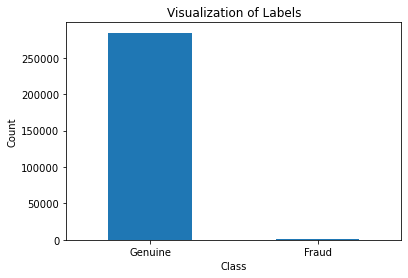

In [12]:
#ploting information using matplotlib

labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

Through above visualization, the difference between geniuine and fraud transaction shows the need for scaling of data.Scaling technique is applied to 'Amount' feature, adding new column with scaled values and dropping irrelevant data

In [13]:
scaler = StandardScaler()
df["ScaledAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace=True, axis= 1)
Y = df["Class"]
X = df.drop(["Class"], axis= 1)

Train and Test Split of 70-30

In [15]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size = 0.30, random_state = 40)

print("Shape of train_X: " ,train_X.shape)
print("Shape of test_X: " ,test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


## Applying Machine Learning Algorithms

### Decision Tree

In [16]:
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y)
dt_predict = dt.predict(test_X)


In [17]:
accuracy_dt = accuracy_score(test_Y, dt_predict)
f1_score_dt = f1_score(test_Y, dt_predict)
precision_score_dt = precision_score(test_Y, dt_predict)
print("precision score of Decision tree model :" , precision_score_dt)
print("Accuracy of Decision tree model :" , accuracy_dt)
print("F1 score of Decision tree model :" , f1_score_dt)
confusion_matrix(test_Y, dt_predict, labels = [0,1])

precision score of Decision tree model : 0.7552447552447552
Accuracy of Decision tree model : 0.9992392589211521
F1 score of Decision tree model : 0.7686832740213522


array([[85270,    35],
       [   30,   108]], dtype=int64)

the first row of array represents positive and the second row represents negative. so, above are 85270 as true positive and 35 are false positive, meaning, out of 85270+35=85305, we have 85270 that are successfully classified as a normal transaction and 35 were falsely classified as normal — but they were fraudulent.

### Random Forest

In [18]:
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)
rf_predict = rf.predict(test_X)

In [19]:
accuracy_rf = accuracy_score(test_Y, rf_predict)
f1_score_rf = f1_score(test_Y, rf_predict)
precision_score_rf = precision_score(test_Y, rf_predict)
print("precision score of Random Forest model :" , precision_score_rf)
print("Accuracy of Random Forest model :" , accuracy_rf)
print("F1 score of Random Forest model :" , f1_score_rf)
confusion_matrix(test_Y, rf_predict, labels = [0,1])

precision score of Random Forest model : 0.9576271186440678
Accuracy of Random Forest model : 0.9996488887328394
F1 score of Random Forest model : 0.8828125


array([[85300,     5],
       [   25,   113]], dtype=int64)

### K-Nearesrt Neighbor

In [20]:
n = 7
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(train_X, train_Y)
knn_predict = knn.predict(test_X)

In [21]:
accuracy_knn = accuracy_score(test_Y, knn_predict)
f1_score_knn = f1_score(test_Y, knn_predict)
precision_score_knn = precision_score(test_Y, knn_predict)
print("precision score of KNN model :" , precision_score_knn)
print("Accuracy of KNN model :" , accuracy_knn)
print("F1 score of KNN model :" , f1_score_knn)
confusion_matrix(test_Y, rf_predict, labels = [0,1])

precision score of KNN model : 0.940677966101695
Accuracy of KNN model : 0.999602073897218
F1 score of KNN model : 0.8671875


array([[85300,     5],
       [   25,   113]], dtype=int64)

Clearly, RANDOM FOREST works better than other 2 models.

The dataset suffers the problem of class imbalance. The genuine (not fraudulent) transactions are more than 99% with the fraudulent transactions constituting of 0.17%.

With such kind of distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there are more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques. Over sampling is one of them.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model.

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
#performing oversampling



X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 40)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [24]:
# Random Forest classifier on the new dataset


rf_resampled = RandomForestClassifier()
rf_resampled.fit(train_X, train_Y)

rf_predict_resampled = rf_resampled.predict(test_X)


In [25]:
accuracy_rf_resampled = accuracy_score(test_Y, rf_predict_resampled)
f1_score_rf_resampled = f1_score(test_Y, rf_predict_resampled)
precision_score_rf_resampled = precision_score(test_Y, rf_predict_resampled)
print("precision score of Random Forest model :" , precision_score_rf_resampled)
print("Accuracy of Random Forest model :" , accuracy_rf_resampled)
print("F1 score of Random Forest model :" , f1_score_rf_resampled)
confusion_matrix(test_Y, rf_predict_resampled, labels = [0,1])

precision score of Random Forest model : 0.9997882352941176
Accuracy of Random Forest model : 0.9998944832316269
F1 score of Random Forest model : 0.9998941064347989


array([[85589,    18],
       [    0, 84982]], dtype=int64)

it is evident that after addressing the class imbalance problem, the Random forest classifier with SMOTE performs far better than the Random forest classifier without SMOTE